<a href="https://colab.research.google.com/github/anugit28/testrepo/blob/main/ML_MODEL_FOR_DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Part 1: Data Preprocessing & Exploration**

In [ ]:
#loading dataset for diabetes in pandas dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
#printing first 10 rows of dataset
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
#getting the statistical measures of data
#summary statistics
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
#0=non-diabetic
#1=diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()
#here we can see that ppl with greater age are more susceptible to get diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#seperating data and labels
X= diabetes_dataset.drop(columns='Outcome', axis=1)
Y= diabetes_dataset['Outcome']

In [ ]:
print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#SUMMARY STATISTICS
#data standardisation
#we are normalising data here
scaler= StandardScaler()


In [ ]:
scaler.fit(X)
#fitting all inconsistent data with the function

StandardScaler()

In [ ]:
standardised_data= scaler.transform(X)
#based on the output transforming all data into a common range as in a median

In [ ]:
#The dataset is now standardized.
print(standardised_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=standardised_data
Y=diabetes_dataset['Outcome']

In [ ]:
#Mean values are centered around 0, and standard deviation is ~1 after scaling.
#printing x train and x test data
#Outcome variable (0 = Non-Diabetic, 1 = Diabetes) is imbalanced (~35% positive cases).
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#Data Distributions

import matplotlib.pyplot as plt
import seaborn as sns

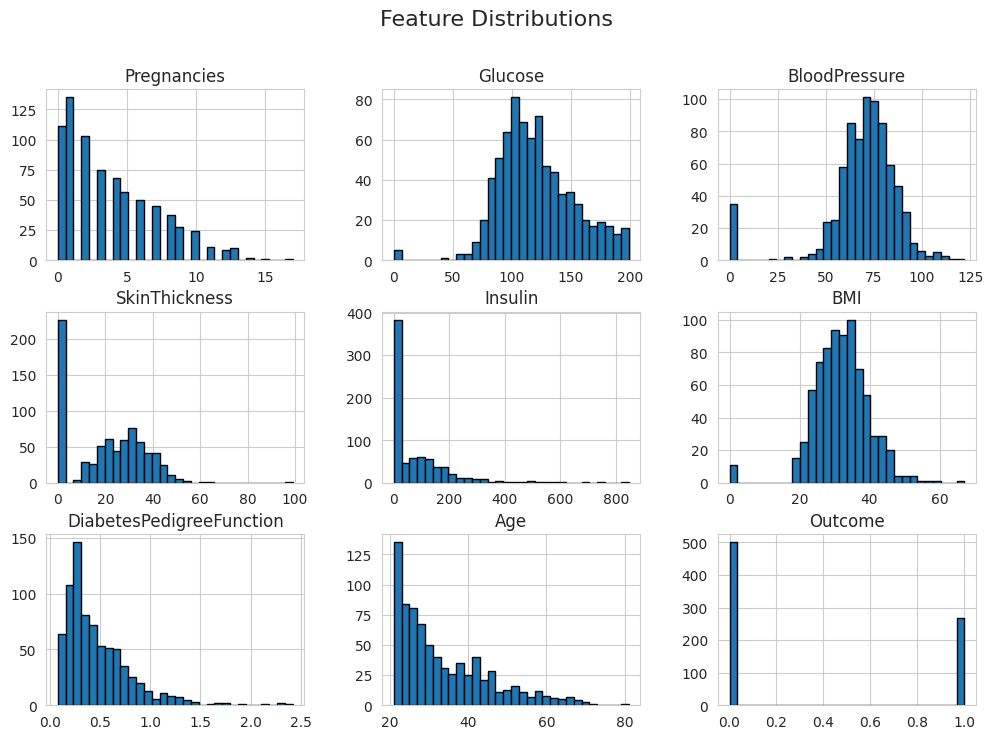

In [ ]:
#based on summary statistics mentioned above
#histogram
# Set plot style
sns.set_style("whitegrid")

# Create histograms
diabetes_dataset.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

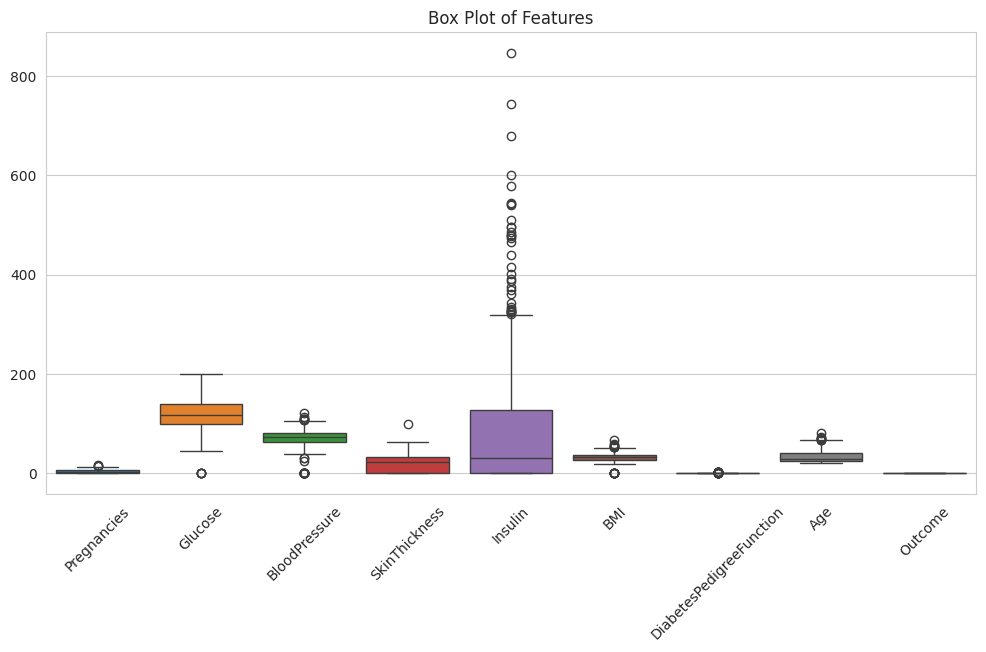

In [ ]:
# Creating box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_dataset)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

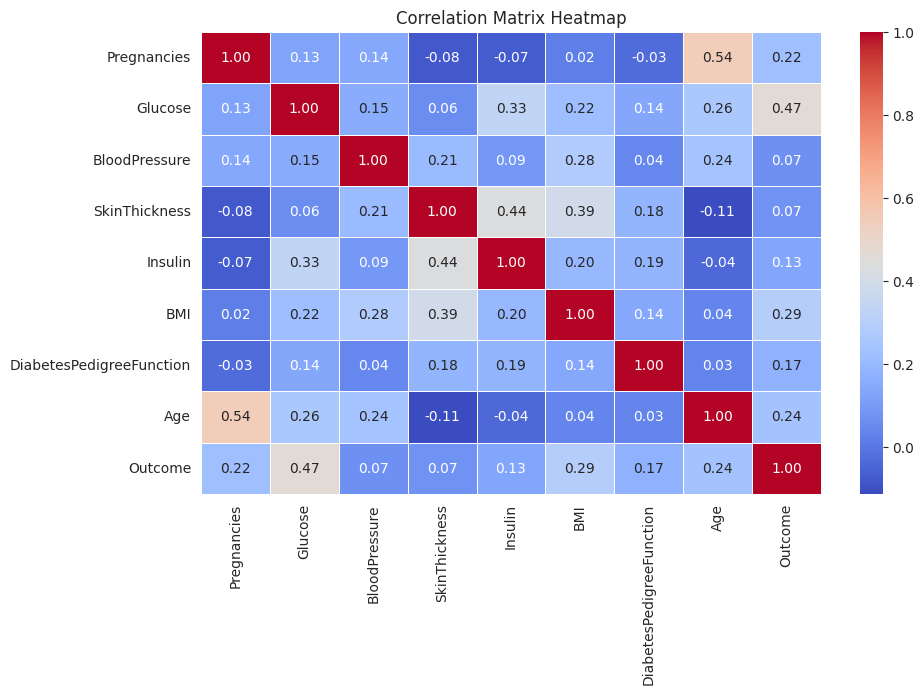

In [ ]:
#Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
#Outlier Detection & Handling (IQR Method)
#Significant outliers were detected in BloodPressure (45), Insulin (34), and BMI (19).
#These may need log transformation instead of removal.
import numpy as np

# Define columns to check for outliers
columns = diabetes_dataset.columns[:-1]  # Exclude 'Outcome'

# Compute IQR
Q1 = diabetes_dataset[columns].quantile(0.25)
Q3 = diabetes_dataset[columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (diabetes_dataset[columns] < (Q1 - 1.5 * IQR)) | (diabetes_dataset[columns] > (Q3 + 1.5 * IQR))
outliers = diabetes_dataset[columns][outlier_mask].count()

# Print number of outliers in each feature
print("Outlier counts per feature:\n", outliers)

# Option 1: Remove outliers
diabetes_dataset_cleaned = diabetes_dataset[~outlier_mask.any(axis=1)]


Outlier counts per feature:
 Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64


**Part 2: Feature Engineering & Selection**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# 1. Handle categorical variables
# This dataset does not have categorical variables


# Identify and remove highly correlated features
correlation_matrix = diabetes_dataset.corr()
high_corr_features = set()

# Find pairs of highly correlated features (threshold > 0.85)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            col_name = correlation_matrix.columns[i]
            high_corr_features.add(col_name)

# Drop highly correlated features
diabetes_dataset_reduced = diabetes_dataset.drop(columns=high_corr_features)

#  Apply Feature Selection (SelectKBest with Mutual Information)
X = diabetes_dataset_reduced.drop(columns=["Outcome"])
y = diabetes_dataset_reduced["Outcome"]
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_imputed = imputer.fit_transform(X) # Impute missing values in X

# Select top k best features using imputed data
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Selecting top 5 features
X_selected = selector.fit_transform(X_imputed, y) # Use imputed data for feature selection

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Display selected features
selected_feature_names

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [ ]:
#train test split
#y-train explains all labels for x-train data
#y-train explains all labels (like 0 == Non-Diabetic 1== Diabetic)for x-test data
#train test split gives 4 outputs
#stratify=y maintains the same proportion of diabetic vs non-diabetic cases in both sets.
#random_state for spliting of data in index columns
from sklearn.model_selection import train_test_split # Import train_test_split here


X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_test.shape,X_train.shape)

(768, 8) (231, 8) (537, 8)


**Training the model**





**Support Vector Machine (SVM)**

In [ ]:
classifier=svm.SVC(kernel='linear',probability=True)




In [ ]:
#training the support vector machine classifier
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform it
X_train = imputer.fit_transform(X_train)

# Transform the test data as well using the trained imputer
X_test = imputer.transform(X_test)

# Now you can train your model:

classifier.fit(X_train,Y_train)
#model has been trained


SVC(kernel='linear', probability=True)

**MODEL EVALUATION FOR SVM**

**ACCURACY SCORE FOR SVM**

In [ ]:
#ACCURACY SCORE ON TRAINING DATA
#we create model label predictions stored in X_train_prediction and compare with og labels in Y_train
X_train_prediction=classifier.predict(X_train)
training_dataaccuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
#the model has 77% accuracy rating meaning outoff 100 predictions it gives 76% accurate results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
f1 = f1_score (X_train_prediction,Y_train)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision_score( X_train_prediction,Y_train):.4f}")
print(f"Recall: {recall_score(X_train_prediction,Y_train):.4f}")
print('accuracy score of trainee data:',training_dataaccuracy)


F1 Score: 0.6467
Precision: 0.5775
Recall: 0.7347
accuracy score of trainee data: 0.7802607076350093


In [ ]:
#accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_dataaccuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
#the model has 77% accuracy rating meaning outoff 100 predictions it gives 76% accurate results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
f1 = f1_score (X_test_prediction,Y_test)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision_score( X_test_prediction,Y_test):.4f}")
print(f"Recall: {recall_score(X_test_prediction,Y_test):.4f}")
print('accuracy score of trainee data:',test_dataaccuracy)


F1 Score: 0.6061
Precision: 0.4938
Recall: 0.7843
accuracy score of trainee data: 0.7748917748917749


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}

# Grid Search for Logistic Regression
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, Y_train)
# Get best parameters
best_log_reg = log_reg_grid.best_estimator_



In [ ]:
# predictions on X_train
X_pred_log = log_reg_grid.predict(X_train)
training_dataaccuracy=accuracy_score(X_pred_log ,Y_train)

**MODEL EVALUATION FOR LOGISTIC REGRESSION**

In [ ]:
#accuracy score on training data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score of trainee data:',training_dataaccuracy)
f1 = f1_score (X_pred_log,Y_train)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision_score( X_pred_log,Y_train):.4f}")
print(f"Recall: {recall_score(X_pred_log,Y_train):.4f}")


accuracy score of trainee data: 0.7821229050279329
F1 Score: 0.6486
Precision: 0.5775
Recall: 0.7397


In [ ]:
#predictions on X_test
X_pred_log = log_reg_grid.predict(X_test)
test_dataaccuracy=accuracy_score(X_pred_log ,Y_test)

In [ ]:
#accuracy score on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score of trainee data:',test_dataaccuracy)
f1 = f1_score (X_pred_log,Y_test)
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision_score( X_pred_log,Y_test):.4f}")
print(f"Recall: {recall_score(X_pred_log,Y_test):.4f}")

accuracy score of trainee data: 0.7792207792207793
F1 Score: 0.6165
Precision: 0.5062
Recall: 0.7885


**Model Evaluation & Optimization**

**Evaluate Models with Confusion Matrix**

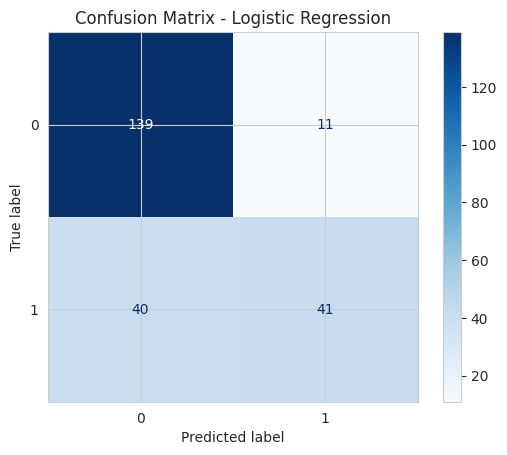

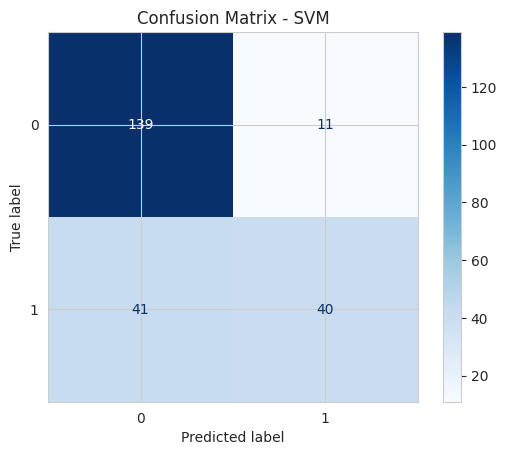

In [ ]:
#for test model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
X_pred_log = best_log_reg.predict(X_test)
X_pred_svm = classifier.predict(X_test)

# Plot Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(Y_test, X_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(Y_test, X_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()



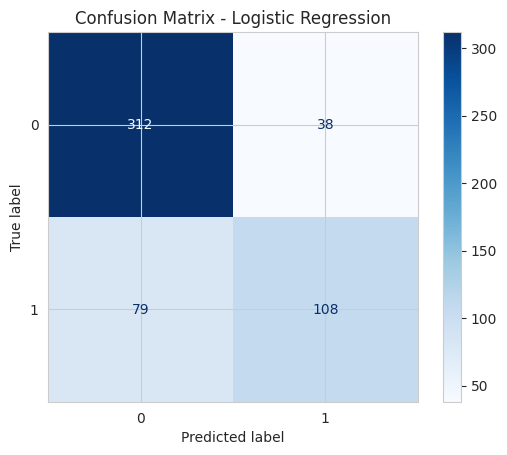

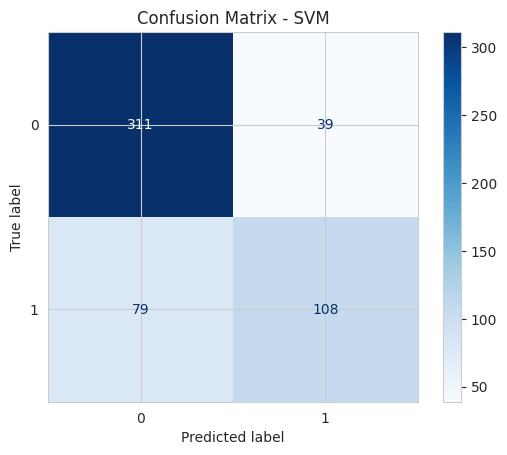

In [ ]:
#for training model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
X_pred_log = best_log_reg.predict(X_train)
X_pred_svm = classifier.predict(X_train)

# Plot Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(Y_train, X_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(Y_train, X_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


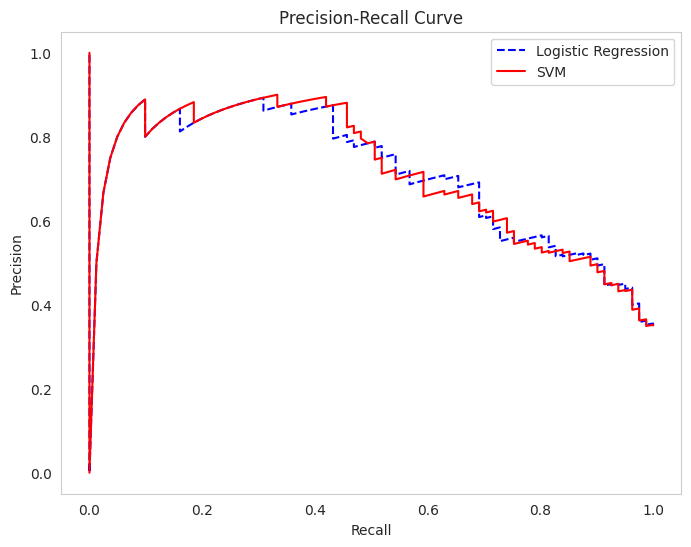

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get probabilities
y_scores_log = best_log_reg.predict_proba(X_test)[:, 1]
y_scores_rf = classifier.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision_log, recall_log, _ = precision_recall_curve(Y_test, y_scores_log)
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, y_scores_rf)
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label="Logistic Regression", linestyle="--", color="blue")
plt.plot(recall_rf, precision_rf, label="SVM", linestyle="-", color="red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


**MAKING PREDICTIVE MODEL**

In [ ]:
input_data=(10,115,0,0,0,35.3,0.134,29,)

#change the input data to numpy array
input_data_as_numpy_array=np.array(input_data)
#reshaping the data
#we are only predicting one instance of the dataset thus param is (1,-1)
inputdatareshaped=input_data_as_numpy_array.reshape(1,-1)
#standardise input data
stddata=scaler.transform(inputdatareshaped)
print(stddata)
prediction=classifier.predict(stddata)
print(prediction)
#if param based on 1st element in given list
if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 1.82781311 -0.184482   -3.57259724 -1.28821221 -0.69289057  0.41977549
  -1.02042653 -0.36084741]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Save the best model
with open("best_model.pkl", "wb") as file:
    pickle.dump(classifier, file)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

# Example prediction
sample_data = [[50, 1, 130, 200, 110, 25.5, 1, 1]]  # Example patient data
prediction = model.predict(sample_data)
print("Predicted Disease Status:", prediction)


Predicted Disease Status: [1]
